In [2]:
# import os
# import pandas as pd
# import numpy as np
# import shutil
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# from torchvision import transforms
import torch
import torch.nn as nn

In [16]:
block_sizes, channels = [8, 14], [10, 32, 200, 640, 128, 256, 512]

In [37]:
in_channels = channels[1]
out_channels = channels[4]
kernel_size = 3
stride = 1
padding = 2
bs = 16
x = torch.rand(bs, in_channels, block_sizes[1], block_sizes[1])
# Define the convolutional layer
conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
print(conv(x).shape)

torch.Size([16, 128, 16, 16])


In [4]:
block_size = 2
num_blocks = (x.shape[-1] // block_size)**2
print(num_blocks)

4


In [6]:
print(x)
for i in range(0, x.shape[-1], block_size):
    for j in range(0, x.shape[-1], block_size):
        print(x[:, :, i:i+block_size, j:j+block_size])

tensor([[[[0.1157, 0.1381, 0.4287, 0.9686],
          [0.8617, 0.5661, 0.7504, 0.9481],
          [0.6765, 0.0781, 0.1254, 0.5907],
          [0.0200, 0.2357, 0.4185, 0.8004]]]])
tensor([[[[0.1157, 0.1381],
          [0.8617, 0.5661]]]])
tensor([[[[0.4287, 0.9686],
          [0.7504, 0.9481]]]])
tensor([[[[0.6765, 0.0781],
          [0.0200, 0.2357]]]])
tensor([[[[0.1254, 0.5907],
          [0.4185, 0.8004]]]])


In [2]:
import pandas as pd

df = pd.read_csv('data/celeba/identity_CelebA.txt', delimiter=' ', header = None, names = ['filename', 'class'])
print(df)

          filename  class
0       000001.jpg   2880
1       000002.jpg   2937
2       000003.jpg   8692
3       000004.jpg   5805
4       000005.jpg   9295
...            ...    ...
202594  202595.jpg   9761
202595  202596.jpg   7192
202596  202597.jpg   9852
202597  202598.jpg   5570
202598  202599.jpg  10101

[202599 rows x 2 columns]


In [3]:
class_names = list(np.unique(np.array(df['class'].to_list())))

In [4]:
len(class_names)

10177

In [5]:
len(df['class'].to_list())

202599

In [6]:
filename_list = df['filename'].to_list()

In [7]:
len(filename_list)

202599

In [8]:
folders_dict = dict()
for i in range(len(filename_list)):
    class_name = df['class'][i]
    if class_name not in folders_dict.keys():
        folders_dict[class_name] = [df['filename'][i]]
    else:
        folders_dict[class_name].append(df['filename'][i])

In [9]:
master_path = 'data/celeba/processed/'
source_path = 'data/celeba/img_align_celeba/'

In [10]:
for class_name in folders_dict.keys():
    class_name_str = str(class_name)
    os.mkdir(master_path + class_name_str + '/')
    for filename in folders_dict[class_name]:
        old_path = os.path.join(source_path, filename)
        new_path = os.path.join(master_path, class_name_str + '/')
        shutil.move(old_path, new_path)

In [2]:
IMAGE_PATH = 'data/celeba/processed/'
batch_size = 64
image_size = 64

In [3]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageFolder(IMAGE_PATH, transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)

In [4]:
img, labels = next(iter(data_loader))

In [5]:
img.shape

torch.Size([64, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


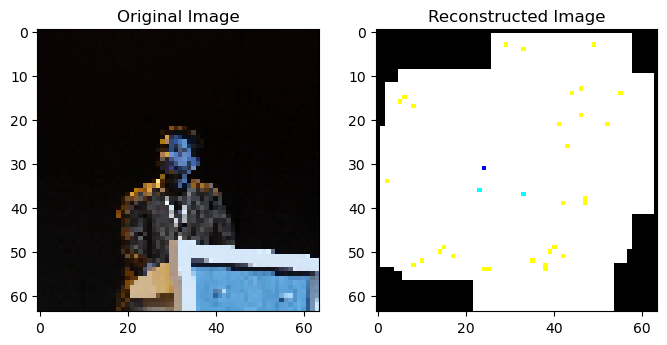

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import random

def generate_blocks(img):
    block_size = 32
    num_blocks = 16
    
    blocks = []
    for i in range(num_blocks):
        x = random.randint(0, img.shape[0] - block_size)
        y = random.randint(0, img.shape[1] - block_size)
        block = img[x:x+block_size, y:y+block_size, :]
        blocks.append(block)
        
    return blocks

def rearrange_blocks(blocks, block_coords):
    img = np.zeros((64,64,3))
    for i, block in enumerate(blocks):
        x, y = block_coords[i]  
        img[x:x+block.shape[0], y:y+block.shape[1], :] = block
        
    return img  

def generate_and_rearrange(img):
    blocks = generate_blocks(img)
    
    block_coords = []
    for block in blocks:
        x = random.randint(0, img.shape[0] - block.shape[0]) 
        y = random.randint(0, img.shape[1] - block.shape[1])
        block_coords.append((x, y))
        
    img_rearranged = rearrange_blocks(blocks, block_coords)
    
    return img_rearranged

# Example usage
image_size = (64, 64)
original_image = cv2.imread('/home/avideep/Pictures/test.jpg')
original_image = cv2.resize(original_image, (64, 64))

# Generate blocks
# blocks, block_positions = generate_blocks(original_image)

# Rearrange blocks to obtain the original image
reconstructed_image = generate_and_rearrange(original_image)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title('Reconstructed Image')

plt.show()

original_image = cv2.imread('/home/avideep/Pictures/test.jpg')


In [4]:
original_image.shape

(960, 952, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


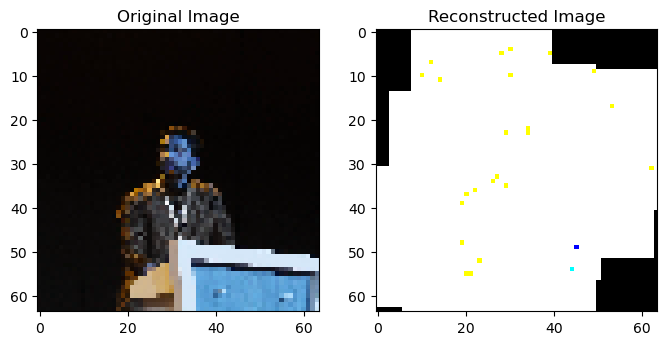

In [11]:

original_image = cv2.resize(original_image, (64, 64))
print(original_image.shape)
# Generate blocks
blocks, block_positions = generate_blocks(original_image)

# Rearrange blocks to obtain the original image
reconstructed_image = rearrange_blocks(blocks, block_positions, original_image.shape)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')

axes[1].imshow(reconstructed_image)
axes[1].set_title('Reconstructed Image')

plt.show()


In [33]:
import numpy as np
from PIL import Image

def generate_blocks(img):

    blocks = []
    used = np.zeros_like(img[:,:,0])

    for i in range(16):
       
        # Keep picking random crops until whole image covered
        while True:  
            x = np.random.randint(0, img.shape[0]-32)
            y = np.random.randint(0, img.shape[1]-32)
            
            if used[x:x+32,y:y+32].sum() < 1024:
                break
                
        block = img[x:x+32, y:y+32] 
        used[x:x+32, y:y+32] = 1
        blocks.append(block)

    return blocks
                
def rearrange_blocks(blocks, img):
    
    canvas = np.zeros_like(img)
    corners = []
    
    for block in blocks:
        
        x = np.random.randint(0, canvas.shape[0]-block.shape[0])  
        y = np.random.randint(0, canvas.shape[1]-block.shape[1]) 
        corners.append((x, y))
        
        canvas[x:x+32, y:y+32] = block
        
    return canvas, corners

img = np.random.rand(64, 64, 3)  
        
blocks = generate_blocks(img)
recon, _ = rearrange_blocks(blocks, img)
print(np.array_equal(img, recon))

False


In [1]:
import torch
a = torch.randn(16, 10, 64, 64)

In [10]:
import numpy as np
blocks = np.split(a, 2, axis=3)

In [11]:
blocks[0].shape

torch.Size([16, 10, 64, 32])

In [1]:
import torch

In [2]:
a = b = torch.randn(16,10,32,32)

In [3]:
torch.cat([a,b],dim=1).shape

torch.Size([16, 20, 32, 32])

In [1]:
import scann
from dataloader import CIFAR10, CelebAHQ
import torch
import numpy as np

2024-03-16 16:50:49.709754: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-16 16:50:49.711828: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 16:50:49.755883: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 16:50:49.756578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 16:50:50.553895: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
data = CelebAHQ()

In [4]:
trainloader = data.train

In [5]:
dset = data.dset

AttributeError: 'CelebAHQ' object has no attribute 'dset'

In [2]:
dset = torch.rand((30000,10,32,32))

In [16]:
encoder = data.encoder

In [17]:
x, _ = next(iter(trainloader))

In [18]:
x.shape

torch.Size([16, 3, 256, 256])

In [19]:
x_clip = data.get_encodings(x)

In [3]:
x_clip = torch.rand(16, 10240)

In [12]:
normalized_dset = (dset / np.linalg.norm(dset, axis=1)[:, np.newaxis]).view(30000,-1)

In [5]:
%%time
searcher = scann.scann_ops_pybind.builder(normalized_dset, 10, "dot_product").tree(
    num_leaves=2000, num_leaves_to_search=100, training_sample_size=250000).score_ah(
    2, anisotropic_quantization_threshold=0.2).reorder(100).build()

CPU times: user 13h 20min 1s, sys: 2min 39s, total: 13h 22min 41s
Wall time: 20min 18s


2024-03-16 16:51:14.781297: I scann/partitioning/partitioner_factory_base.cc:59] Size of sampled dataset for training partition: 30000
2024-03-16 17:07:47.567231: I ./scann/partitioning/kmeans_tree_partitioner_utils.h:84] PartitionerFactory ran in 16m32.785867434s.


In [8]:
%%time
neighbors, distances = searcher.search_batched(x_clip, leaves_to_search=150, pre_reorder_num_neighbors=250)

CPU times: user 81 ms, sys: 4 µs, total: 81 ms
Wall time: 80.1 ms


In [9]:
neighbors.shape

(16, 10)

In [10]:
neighbors

array([[16280, 14496, 18776,  5616, 14725, 10066, 25145, 15452,  5695,
        22242],
       [11450, 15139, 29127, 19329, 10003,  3551,   327, 10910, 26257,
        22191],
       [12112, 24240, 26683,  4863, 16802,  1096, 20483,  3976,  2236,
         6932],
       [26970,  1811, 14725, 27424,  6794, 12829, 27025, 13821, 26904,
        16520],
       [28984, 17802, 19140,  7030, 26287,  9732, 10932, 10883, 12489,
         1673],
       [20120,  4913, 28822,  9061,   449, 25261, 29690, 15299, 11400,
         9198],
       [ 1720, 21535, 27493, 21101, 10520, 27353, 22184,  2395, 18685,
        15912],
       [ 5384,  7030, 11450, 14951,  4863, 22489,  4394, 26127,  1695,
         8148],
       [ 5092, 22129,  5158, 24925, 15036, 19904, 18295, 22680, 27609,
        23957],
       [  140, 24598, 24622, 14598, 26762, 23798, 17444, 10951,  4578,
        13012],
       [16992,  3913, 24311, 10423,  3519, 11396, 22232, 11615,  1209,
        15271],
       [17745, 16613, 14889, 24671,  7891, 

In [13]:
neib = normalized_dset[np.int64(neighbors[0])]

In [14]:
neib.shape

torch.Size([10, 10240])

In [15]:
def make_neighbor_matrix(neighbors, dset):
    mat = []
    for neighbor in neighbors:
        mat.append(dset[np.int64(neighbor)])
    return torch.stack(mat)

In [16]:
neighbor_matrix = make_neighbor_matrix(neighbors,normalized_dset)

In [17]:
len(neighbor_matrix)

16

In [18]:
neighbor_matrix.shape

torch.Size([16, 10, 10240])

In [19]:
neighbor_matrix

tensor([[[0.0372, 0.0162, 0.0283,  ..., 0.2961, 0.1824, 0.3263],
         [0.0770, 0.4204, 0.0614,  ..., 0.0348, 0.2252, 0.3736],
         [0.0173, 0.4839, 0.1670,  ..., 0.3618, 0.1019, 0.4891],
         ...,
         [0.4913, 0.1124, 0.3967,  ..., 0.0302, 0.3930, 0.3690],
         [0.0123, 0.3142, 0.4498,  ..., 0.1945, 0.1868, 0.1734],
         [0.4920, 0.1615, 0.2365,  ..., 0.3264, 0.3340, 0.0046]],

        [[0.3615, 0.4800, 0.4086,  ..., 0.4393, 0.0463, 0.3665],
         [0.3390, 0.3713, 0.3324,  ..., 0.1103, 0.2187, 0.2309],
         [0.5155, 0.2575, 0.3753,  ..., 0.2395, 0.4669, 0.3765],
         ...,
         [0.2457, 0.4035, 0.4441,  ..., 0.3464, 0.2462, 0.2198],
         [0.4559, 0.3202, 0.1395,  ..., 0.1810, 0.2020, 0.1887],
         [0.1712, 0.3429, 0.4876,  ..., 0.1556, 0.2911, 0.2072]],

        [[0.3167, 0.1722, 0.4432,  ..., 0.4621, 0.3406, 0.4300],
         [0.4513, 0.4425, 0.1365,  ..., 0.4030, 0.1921, 0.3193],
         [0.2988, 0.1077, 0.4188,  ..., 0.0651, 0.5356, 0.

In [20]:
distances

array([[1427.6368, 1426.9172, 1426.6736, 1425.7695, 1425.1958, 1424.9917,
        1424.73  , 1424.1182, 1424.0312, 1423.8364],
       [1433.1831, 1432.8154, 1432.3281, 1432.2935, 1432.1848, 1431.0618,
        1430.6151, 1430.5171, 1430.3052, 1429.8944],
       [1439.7   , 1437.9705, 1436.4957, 1436.0735, 1435.9844, 1435.7462,
        1435.6628, 1435.5947, 1435.4102, 1435.2876],
       [1427.9231, 1427.5042, 1427.2346, 1426.668 , 1426.6367, 1426.3953,
        1425.5891, 1425.3495, 1425.329 , 1425.3203],
       [1434.9873, 1433.8091, 1433.2107, 1433.1787, 1432.9541, 1432.6389,
        1431.7952, 1430.9412, 1430.7947, 1430.6423],
       [1424.8086, 1423.6101, 1420.0184, 1419.9062, 1419.8286, 1418.6274,
        1418.4794, 1418.3654, 1418.2068, 1418.1997],
       [1430.4906, 1429.7233, 1429.6084, 1429.5171, 1429.4636, 1428.729 ,
        1427.8856, 1427.7888, 1427.5281, 1427.4733],
       [1440.5557, 1436.9271, 1436.8927, 1434.5593, 1434.0247, 1433.6382,
        1433.3523, 1433.1003, 1432.94

In [4]:
import torch
import torch.nn.functional as F
# Assuming your condition tensor is named 'condition' and has shape (10, 512)
condition = torch.rand((1, 2, 8))
input_shape = (1, 2, 4, 4)
b, c, h, w = input_shape
condition = condition.view(b,c,h,-1)
pad = (2,2)
input = torch.rand(input_shape)
output = F.pad(condition, pad, "constant", 0)
output

tensor([[[[0.0000, 0.0000, 0.5010, 0.0499, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.5405, 0.5152, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1153, 0.5376, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.3352, 0.1458, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.8031, 0.1613, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.6341, 0.6133, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1702, 0.6066, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.5321, 0.2214, 0.0000, 0.0000]]]])

In [1]:
import matplotlib.pyplot as plt
import os

def plot_images(image_dir):

    # Get the list of image file names
    image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')])

    # Create a figure and axis
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))

    # Flatten the axis array to iterate over it easily
    axs = axs.flatten()

    # Plot each image
    for i, image_file in enumerate(image_files):
        img = plt.imread(image_file)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
def list_files(directory):
    files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list
def plot_images2(image_dir):

    # Get the list of image file names
#     image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')])
    image_files = list_files(image_dir)
    # Create a figure and axis
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))

    # Flatten the axis array to iterate over it easily
    axs = axs.flatten()

    # Plot each image
    for i, image_file in enumerate(image_files):
        img = plt.imread(image_file)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()


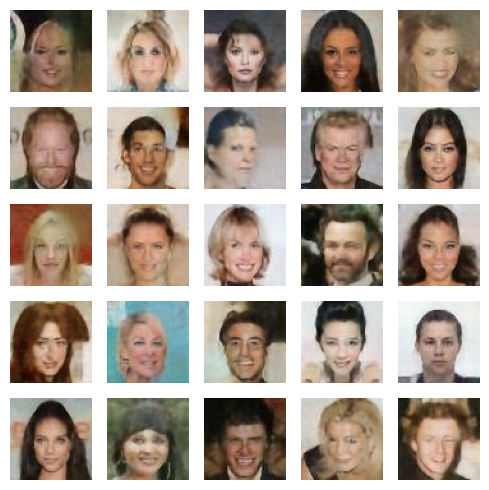

In [2]:
plot_images('samples')

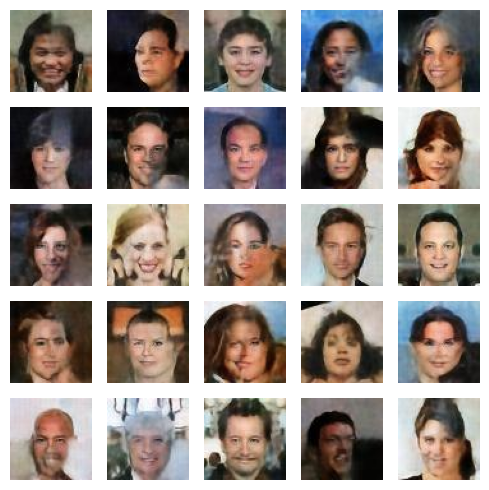

In [11]:
plot_images('samples/new/')

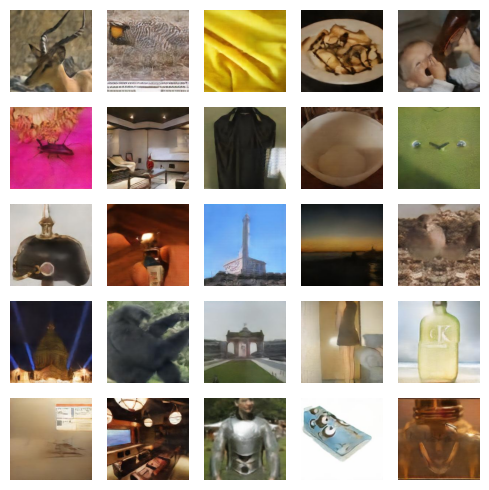

In [9]:
plot_images2('samples/imagenet_samples/')

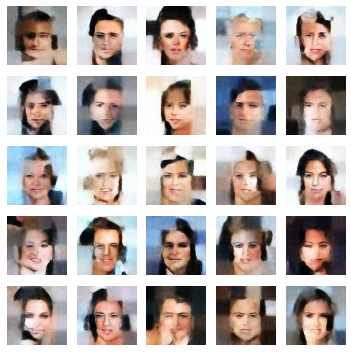

In [4]:
plot_images2('/home/avideep/Pictures/samples/blocks_16/')

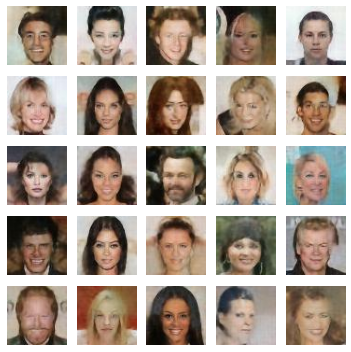

In [5]:
plot_images2('/home/avideep/Pictures/samples/blocks_4/')

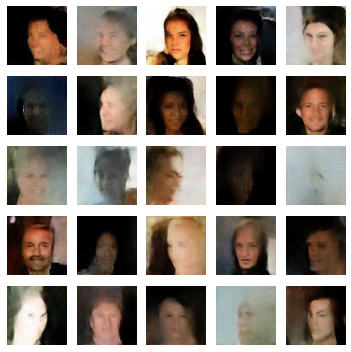

In [2]:
plot_images2('/home/avideep/Pictures/samples/baseline/')

In [2]:
from dataloader import PlantNet, CIFAR10, CelebA, CelebAHQ, ImageNet100

2024-04-03 11:20:59.451465: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 11:20:59.505921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 11:21:00.323721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = ImageNet100()

In [5]:
x, _ = next(iter(data.train))

In [6]:
x.shape

torch.Size([16, 3, 224, 224])

In [9]:
import torch

In [10]:
import os
import random
import torch
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
import numpy as np
from PIL import Image
import torch.nn.functional as F
from tqdm import tqdm

In [13]:
def tensor2img(tensor):
    """ Convert torch.Tensor to PIL image. """
    n_channels = tensor.shape[0]

    img = tensor.detach().cpu()
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]
    inv_normalize = transforms.Compose([
            transforms.Normalize(mean=0, std=[1./s for s in std]),
            transforms.Normalize(mean=[-m for m in mean], std=1.),
            lambda x: x*255
        ])
    img = inv_normalize(img)

    if n_channels > 1:
        return Image.fromarray(img.permute(1, 2, 0).numpy().astype('uint8')).convert("RGB")
    else:
        return Image.fromarray(img[0].numpy()).convert("L")

In [18]:
def plot_tensor_images(x):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))

    # Flatten the axis array to iterate over it easily
    axs = axs.flatten()

    # Plot each image
    for i, image_file in enumerate(x):
        axs[i].imshow(tensor2img(image_file))
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

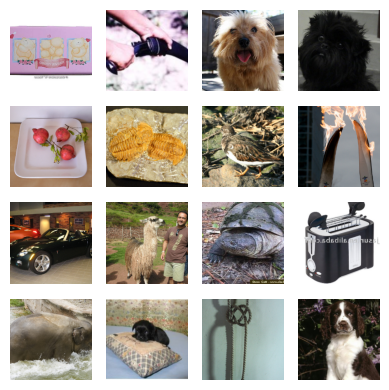

In [19]:
plot_tensor_images(x)

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_y'

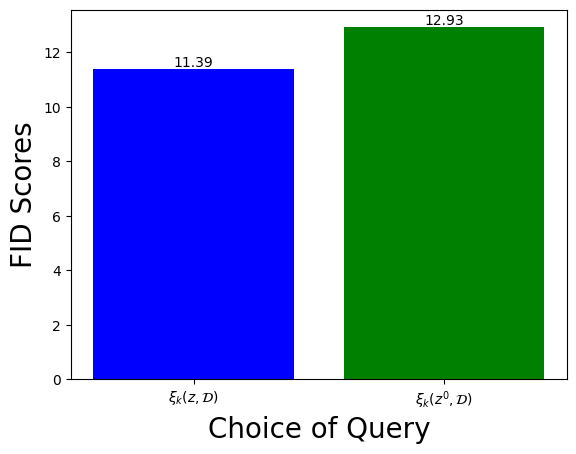

In [15]:
import matplotlib.pyplot as plt

# Method names
methods = [r'$\xi_k(z, \mathcal{D})$', r'$\xi_k(z^0, \mathcal{D})$']

# FID scores
fid_scores = [11.39, 12.93]  # Example values, replace with your actual data

# Create bar plot
plt.bar(methods, fid_scores, color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Choice of Query', fontsize = 20)
plt.ylabel('FID Scores', fontsize = 20)
# plt.title('Comparison of FID Scores for ')

for i in range(len(methods)):
    plt.text(i, fid_scores[i], str(fid_scores[i]), ha='center', va='bottom')
for i in range(len(methods)):
    plt.text(0.1, plt.get_y()+plt.get_height()/2, disease, color = 'white', ha = 'left', va = 'center') 

plt.savefig('fid_z_vs_zi.png', bbox_inches='tight', dpi=300)
# Display the plot
plt.show()
